# __Projekt Herzkrankheiten__

Projektarbeit des Moduls 2PythGr von Kai Beerli, Christian Felzen und Pierluigi Margarito

## __Inhaltsverzeichnis__
1. [Kontext](#Kontext)
2. [Bibliothek laden](#Bibliotheken-laden)
3. [Explorative Datenanalyse (EDA)](#Explorative-Datenanalyse-(EDA))
4. [Unifying & Transformation](#Unifying-&-Transformation)
5. [Data Cleansing](#Data-Cleansing)
6. [Analysis & Validation](#Analysis-&-Validation)
7. [Feature Selection & Engineering](#Feature-Selection-&-Engineering)
8. [Anwendung in Machine Learning](#Anwendung-in-Machine-Learning)

## __Kontext__
 Klassifizierung von verschiedenen erstellen 'Profilen' für das Risiko einer Herzkrankheit Vorgehen: Wir wollen mindestens 4 verschiedene Profile erstellen und für diese eine Klassifizierung modellieren. Durch das sollen für die 4 Profile eine Aussage gemacht werden können, wie hoch das Risiko für eine Herzkrankheit ist. Dies würden wir mit den unten-genanntem Dataset machen.
Kaggle-Dataset: https://www.kaggle.com/kamilpytlak/personal-key-indicators-of-heartdisease?select=heart_2020_cleaned.csv CDC (Informationsquelle): https://www.cdc.gov/heartdisease/about.htm

## __Bibliothek laden__

In [2]:
# Load the libraries
import os
# Basics
import pandas as pd
import numpy as np
#from IPython.display import display
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from seaborn import color_palette
from sklearn.preprocessing import StandardScaler
import plotly.express as ex
from IPython.display import Image
from sklearn.decomposition import PCA

# ML Models
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import export_graphviz
import pydot
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss 

# XAI Methods
import shap
import lime
import lime.lime_tabular

# Javascript-based dynamical visualization
shap.initjs()


## __Explorative Datenanalyse (EDA)__

In [3]:
Health_Data = pd.read_csv("heart_2020_cleaned.csv", sep=",")
Health_Data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [4]:
Health_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
num_cols = list(Health_Data.select_dtypes('float64'))
cat_cols = list(Health_Data.select_dtypes('object'))
Health_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [9]:
for col in cat_cols:
    print('Unique values for {}: {}'.format(col, Health_Data[col].unique()))

Unique values for HeartDisease: ['No' 'Yes']
Unique values for Smoking: ['Yes' 'No']
Unique values for AlcoholDrinking: ['No' 'Yes']
Unique values for Stroke: ['No' 'Yes']
Unique values for DiffWalking: ['No' 'Yes']
Unique values for Sex: ['Female' 'Male']
Unique values for AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Unique values for Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Unique values for Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Unique values for PhysicalActivity: ['Yes' 'No']
Unique values for GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Unique values for Asthma: ['Yes' 'No']
Unique values for KidneyDisease: ['No' 'Yes']
Unique values for SkinCancer: ['Yes' 'No']


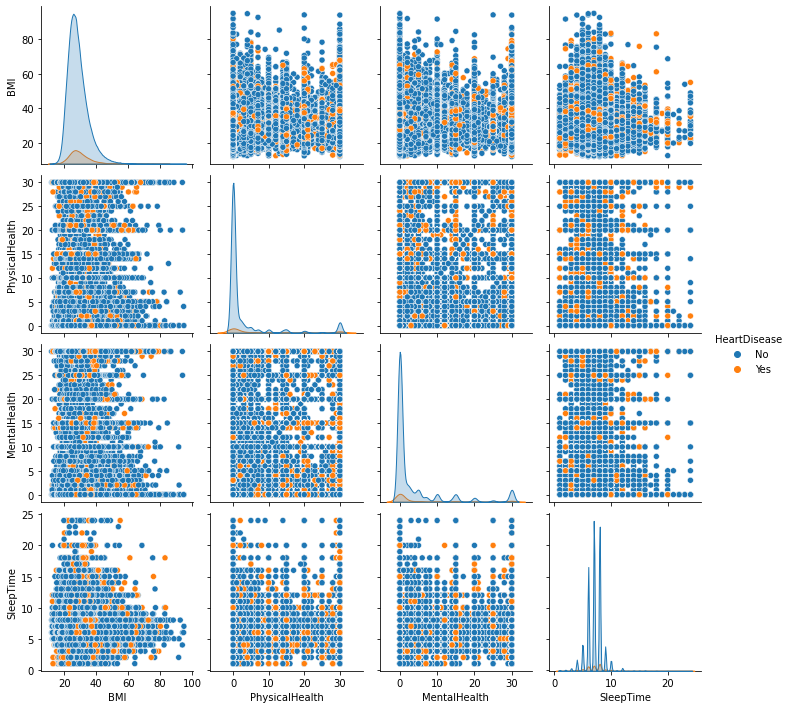

In [10]:
sns.pairplot(Health_Data, hue='HeartDisease');

In [11]:
Health_Data.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

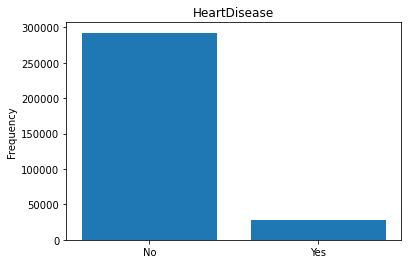

HeartDisease: 
 No     292422
Yes     27373
Name: HeartDisease, dtype: int64


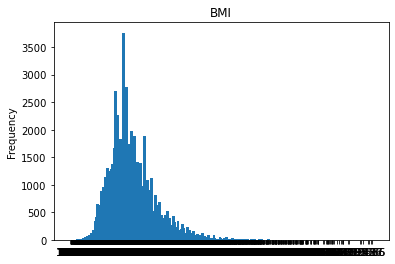

BMI: 
 26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
48.03       1
38.19       1
63.33       1
59.85       1
44.68       1
Name: BMI, Length: 3604, dtype: int64


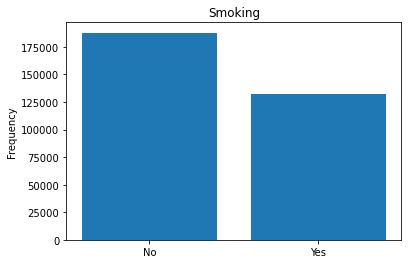

Smoking: 
 No     187887
Yes    131908
Name: Smoking, dtype: int64


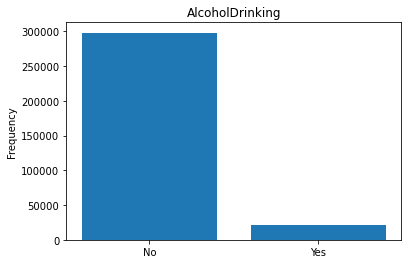

AlcoholDrinking: 
 No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64


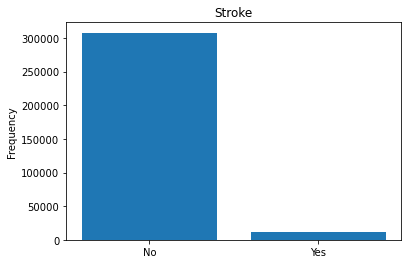

Stroke: 
 No     307726
Yes     12069
Name: Stroke, dtype: int64


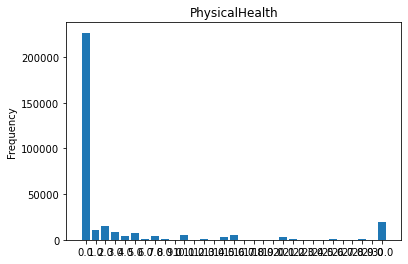

PhysicalHealth: 
 0.0     226589
30.0     19509
2.0      14880
1.0      10489
3.0       8617
5.0       7606
10.0      5453
15.0      5012
7.0       4629
4.0       4468
20.0      3216
14.0      2893
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16.0       135
27.0       124
17.0       110
13.0        91
22.0        89
11.0        85
24.0        67
26.0        66
23.0        46
19.0        35
Name: PhysicalHealth, dtype: int64


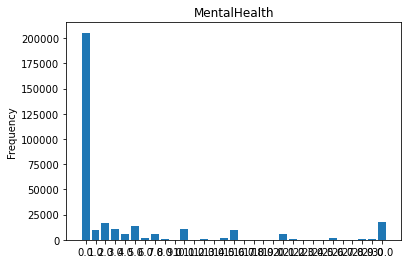

MentalHealth: 
 0.0     205401
30.0     17373
2.0      16495
5.0      14149
10.0     10513
3.0      10466
15.0      9896
1.0       9291
7.0       5528
20.0      5431
4.0       5379
14.0      2048
25.0      1954
6.0       1510
8.0       1094
12.0       757
28.0       515
21.0       352
29.0       317
18.0       211
9.0        203
16.0       152
17.0       128
27.0       126
13.0       110
22.0        98
11.0        83
23.0        68
24.0        67
26.0        59
19.0        21
Name: MentalHealth, dtype: int64


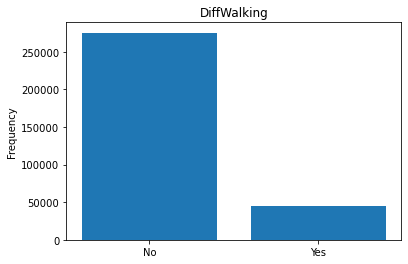

DiffWalking: 
 No     275385
Yes     44410
Name: DiffWalking, dtype: int64


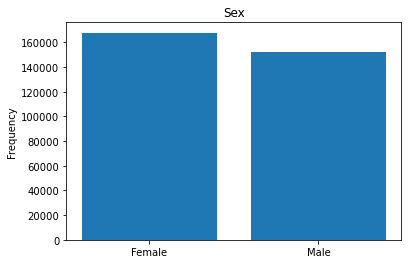

Sex: 
 Female    167805
Male      151990
Name: Sex, dtype: int64


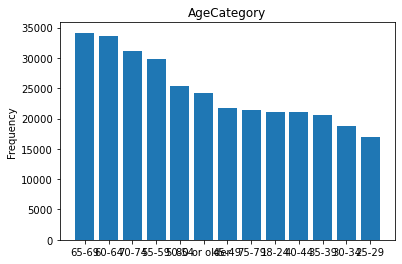

AgeCategory: 
 65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64


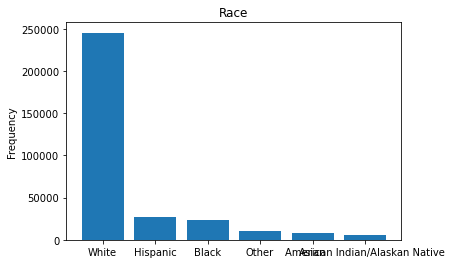

Race: 
 White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64


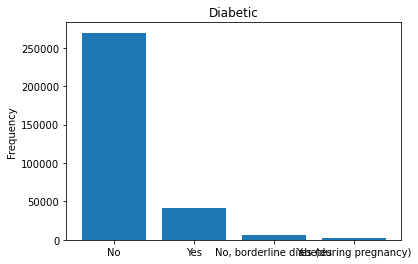

Diabetic: 
 No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64


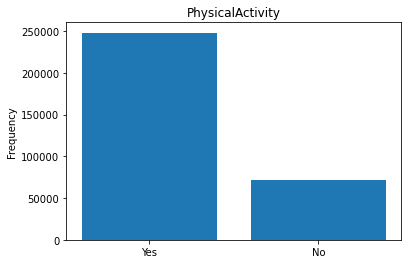

PhysicalActivity: 
 Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64


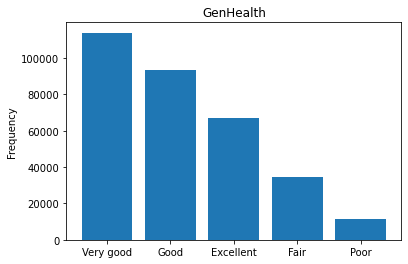

GenHealth: 
 Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64


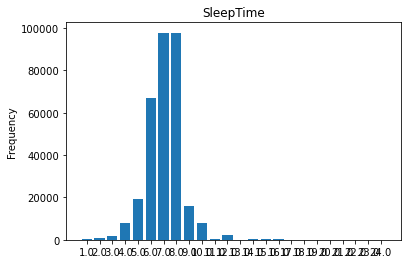

SleepTime: 
 7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64


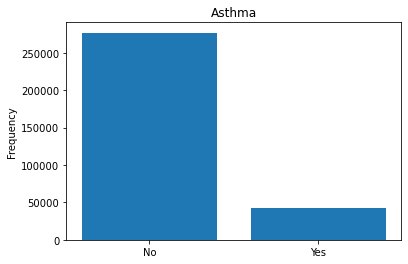

Asthma: 
 No     276923
Yes     42872
Name: Asthma, dtype: int64


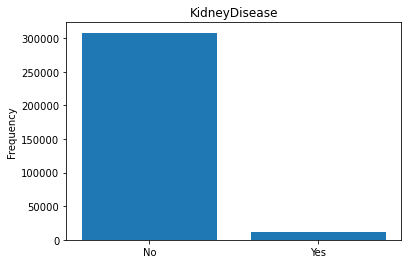

KidneyDisease: 
 No     308016
Yes     11779
Name: KidneyDisease, dtype: int64


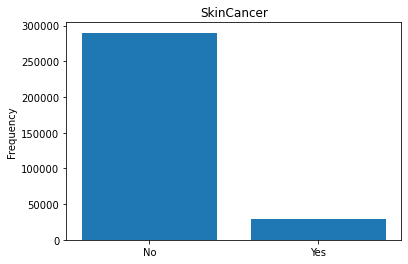

SkinCancer: 
 No     289976
Yes     29819
Name: SkinCancer, dtype: int64


In [16]:
def frequencies(AgeCategory):

    var=Health_Data[AgeCategory]
    varValue=var.value_counts()
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(AgeCategory)
    plt.show()
    print("{}: \n {}".format(AgeCategory,varValue))
    
    
for i in Health_Data:
    frequencies(i)

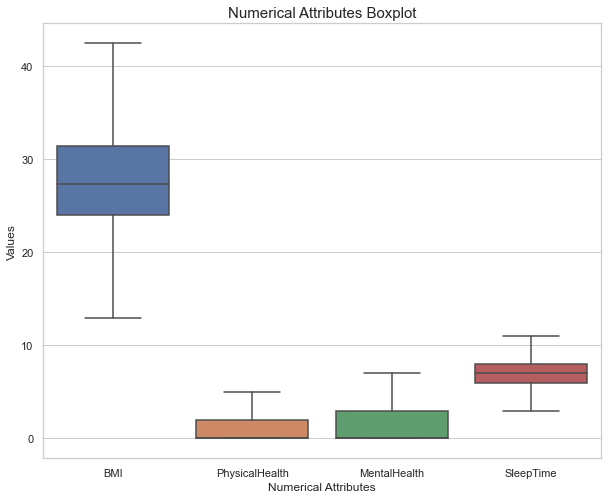

In [18]:
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.boxplot(data=Health_Data, showfliers=False)  
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

## __Unifying & Transformation__

In [3]:
df_HD_adjusted = pd.DataFrame(Health_Data)

In [4]:
df_HD_adjusted["HeartDisease"] = df_HD_adjusted["HeartDisease"].astype('category')
df_HD_adjusted["Smoking"] = df_HD_adjusted["Smoking"].astype('category')
df_HD_adjusted["AlcoholDrinking"] = df_HD_adjusted["AlcoholDrinking"].astype('category')
df_HD_adjusted["Stroke"] = df_HD_adjusted["Stroke"].astype('category')
df_HD_adjusted["DiffWalking"] = df_HD_adjusted["DiffWalking"].astype('category')
df_HD_adjusted["Sex"] = df_HD_adjusted["Sex"].astype('category')
df_HD_adjusted["AgeCategory"] = df_HD_adjusted["AgeCategory"].astype('category')
df_HD_adjusted["Race"] = df_HD_adjusted["Race"].astype('category')
df_HD_adjusted["Diabetic"] = df_HD_adjusted["Diabetic"].astype('category')
df_HD_adjusted["PhysicalActivity"] = df_HD_adjusted["PhysicalActivity"].astype('category')
df_HD_adjusted["GenHealth"] = df_HD_adjusted["GenHealth"].astype('category')
df_HD_adjusted["Asthma"] = df_HD_adjusted["Asthma"].astype('category')
df_HD_adjusted["KidneyDisease"] = df_HD_adjusted["KidneyDisease"].astype('category')
df_HD_adjusted["SkinCancer"] = df_HD_adjusted["SkinCancer"].astype('category')

In [5]:
df_HD_adjusted["HeartDisease"] = df_HD_adjusted["HeartDisease"].cat.codes
df_HD_adjusted["Smoking"] = df_HD_adjusted["Smoking"].cat.codes
df_HD_adjusted["AlcoholDrinking"] = df_HD_adjusted["AlcoholDrinking"].cat.codes
df_HD_adjusted["Stroke"] = df_HD_adjusted["Stroke"].cat.codes
df_HD_adjusted["DiffWalking"] = df_HD_adjusted["DiffWalking"].cat.codes
df_HD_adjusted["Sex"] = df_HD_adjusted["Sex"].cat.codes
df_HD_adjusted["AgeCategory"] = df_HD_adjusted["AgeCategory"].cat.codes
df_HD_adjusted["Race"] = df_HD_adjusted["Race"].cat.codes
df_HD_adjusted["Diabetic"] = df_HD_adjusted["Diabetic"].cat.codes
df_HD_adjusted["PhysicalActivity"] = df_HD_adjusted["PhysicalActivity"].cat.codes
df_HD_adjusted["GenHealth"] = df_HD_adjusted["GenHealth"].cat.codes
df_HD_adjusted["Asthma"] = df_HD_adjusted["Asthma"].cat.codes
df_HD_adjusted["KidneyDisease"] = df_HD_adjusted["KidneyDisease"].cat.codes
df_HD_adjusted["SkinCancer"] = df_HD_adjusted["SkinCancer"].cat.codes

In [6]:
df_HD_adjusted.isna()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319791,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319792,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319793,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df_HD_adjusted = df_HD_adjusted.dropna()

In [8]:
df_HD_adjusted.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,4.396742,0.300386,0.775362,2.220904,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.212208,0.716480,0.417344,1.534647,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


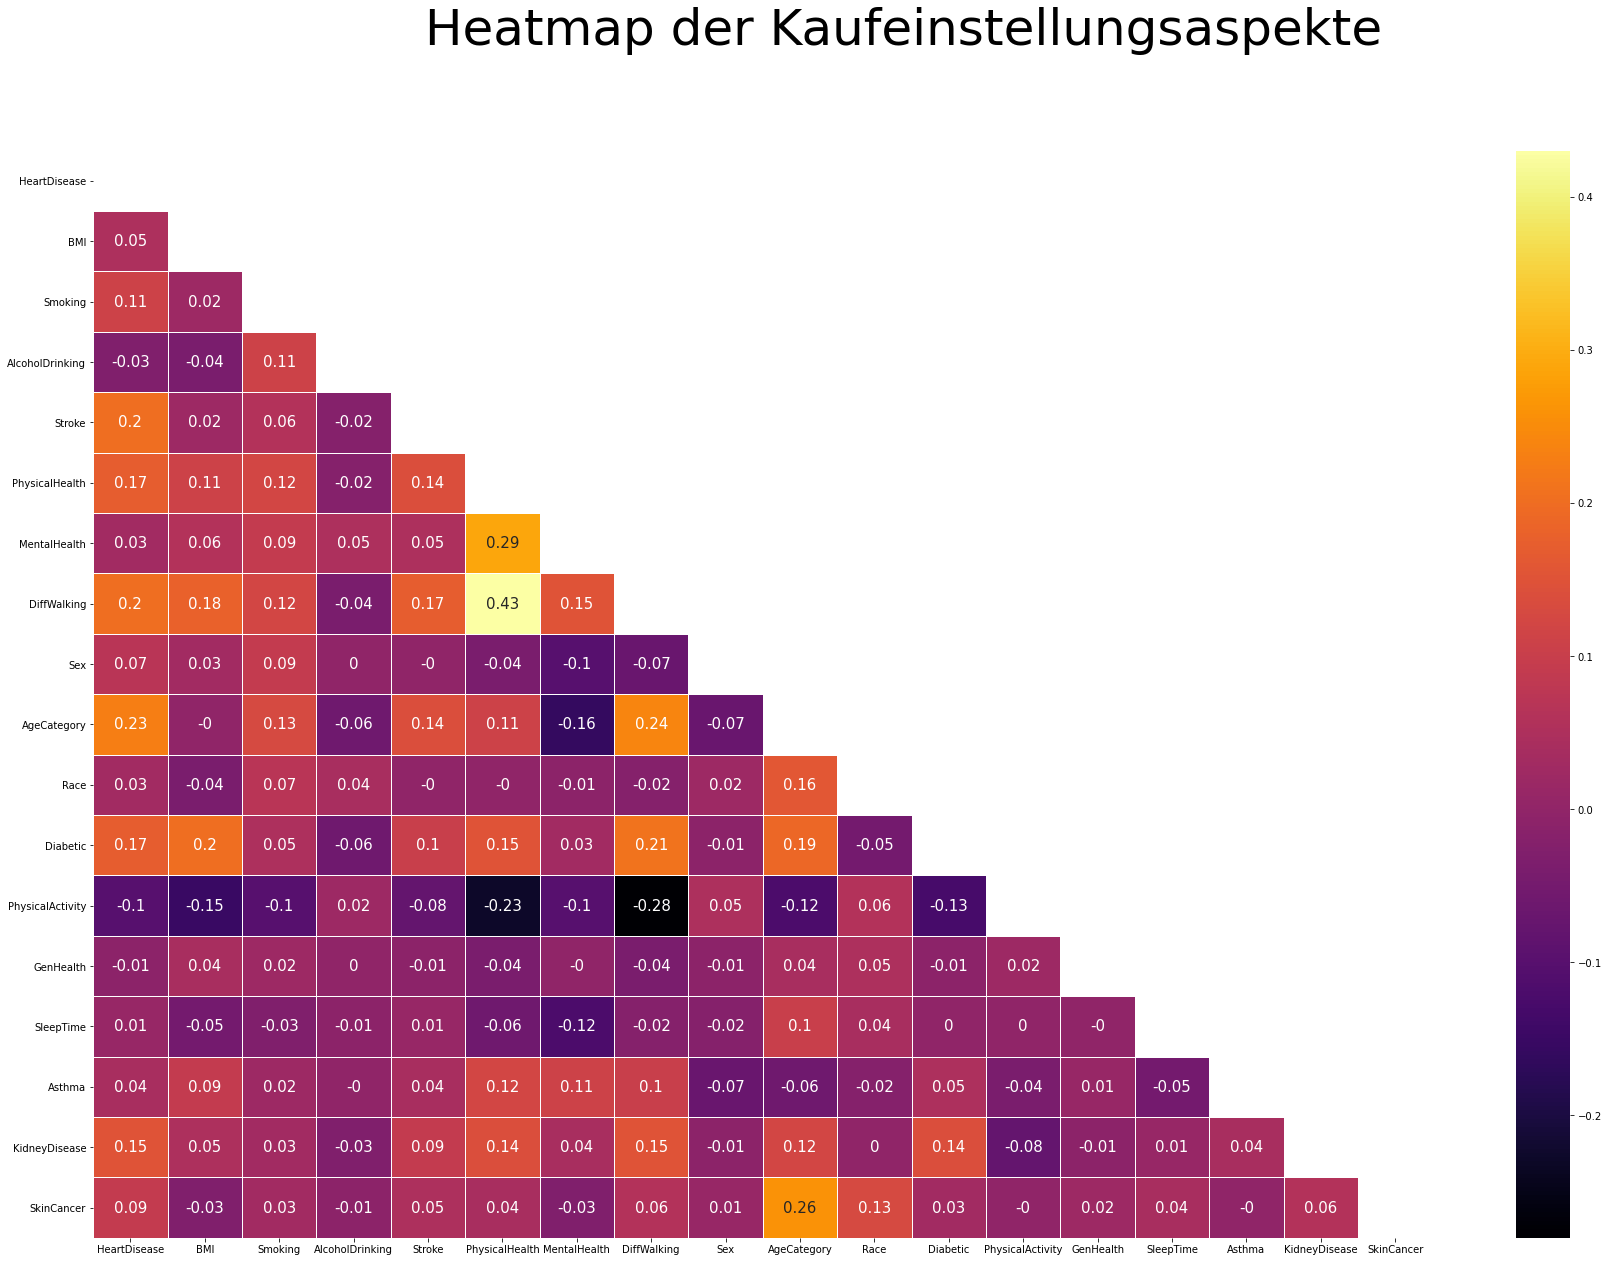

In [9]:
# Heatmap von allen einzelnen Aspekten der Kaufeinstellungen
df_heatmap = df_HD_adjusted.corr().round(2)
f, ax = plt.subplots(figsize=(30, 20))
mask = np.triu(np.ones_like(df_heatmap, dtype=bool))
sns.heatmap(df_heatmap, annot=True, annot_kws={'size': 15}, linewidths=.5, mask=mask, cmap="inferno")

f.suptitle('Heatmap der Kaufeinstellungsaspekte').set_size(50)

## __Data Cleansing__

## __Analysis & Validation__

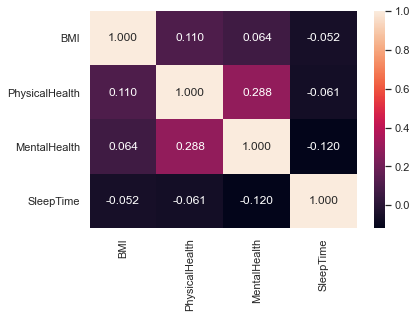

In [19]:
corr_list=["BMI","PhysicalHealth","MentalHealth","SleepTime"]
sns.heatmap(Health_Data[corr_list].corr(),annot=True,fmt=".3f");


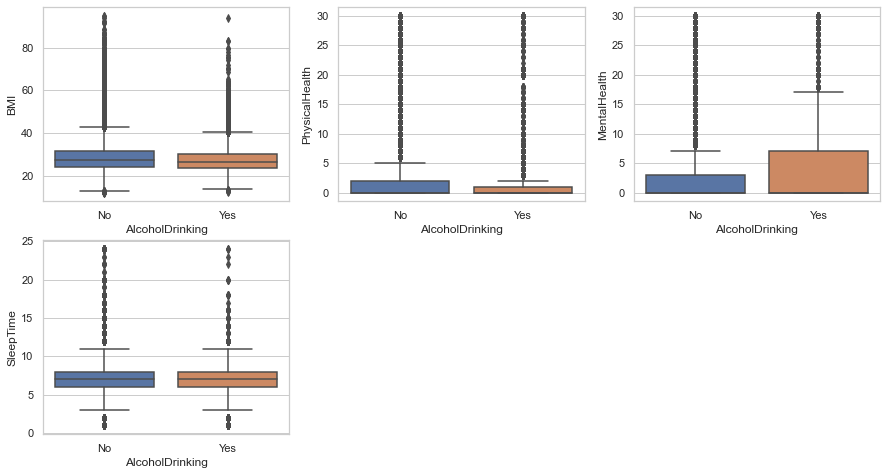

In [21]:
numeric_features = Health_Data.select_dtypes(include=[np.number])
numeric_features.columns

i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=Health_Data[feature], x = Health_Data['AlcoholDrinking'])
    i+=1

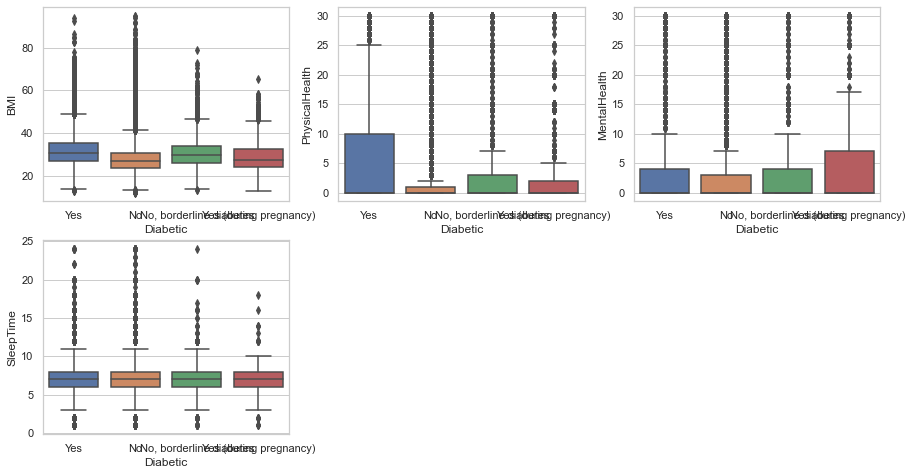

In [23]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=Health_Data[feature], x = Health_Data['Diabetic'])
    i+=1

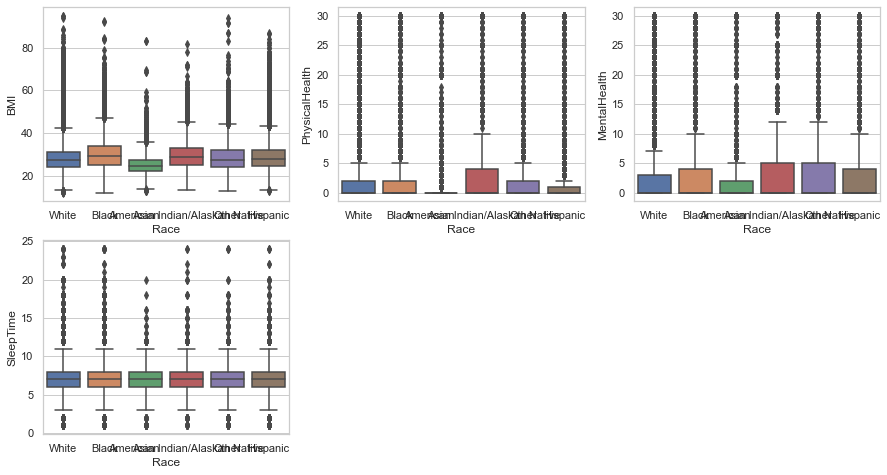

In [24]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=Health_Data[feature], x = Health_Data['Race'])
    i+=1

## __Feature Selection & Engineering__

## __Anwendung in Machine Learning__